---
title: "Assignment 2 - Stock Data Analysis"
author: "Barry, Bella, Emma, Maxim, Robin"
affiliation: "Group 1"
date: today
format:
  pdf:
    geometry:
      - top=2.5cm
      - bottom=2.5cm
      - left=2.5cm
      - right=2.5cm
    fontsize: 11pt
    colorlinks: true
    code-block-bg: "#BFD0D5" 
    code-block-border-left: "#5EC7C0"
    highlight-style: tango
    
---

\newpage
\tableofcontents
\listoffigures
\listoftables
\newpage

Before messing around with the stock data, the environment should install and load the dplyr and lubridate packages as well as others to perform easier data analysis. Additionally, we disable any warning messages for cleaner output. We also remove any rows with NA values in the prcod column.

In [1]:
#| warning: false
library(dplyr)
library(readr)
library(data.table)
library(lubridate)
library(ggplot2)
options(warn=-1)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last



Attaching package: ‘lubridate’


The following objects are masked from ‘package:data.table’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [131]:
#| tbl-cap: "Compressed dataset"
data = fread("compressed_data.csv.gz") %>% 
        filter(!is.na(prcod)) %>% 
        mutate(datadate = as.Date(datadate, "%d/%m/%Y"))
head(data |> select(-conm, -gvkey))

tic,datadate,exchg,sic,cshtrd,prccd,prchd,prcld,prcod
<chr>,<date>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
PNW,2023-01-03,11,4911,1442534,74.63,76.4125,73.380,76.25
PNW,2023-01-04,11,4911,954218,75.39,76.0950,74.630,75.10
PNW,2023-01-05,11,4911,994775,73.65,75.0950,73.305,74.88
PNW,2023-01-06,11,4911,729808,75.46,76.0200,74.480,74.49
PNW,2023-01-09,11,4911,656127,75.55,76.4800,75.240,75.24
PNW,2023-01-10,11,4911,763254,75.65,75.6950,74.880,75.31


# Part 1 Questions & Answers
## 1. How many unique tickers are in your data?

In [151]:
summary_table_1 <- tibble(
  X = "Unique tickers",
  Y = length(unique(data$tic))
)
summary_table_1
cat("1. There are", length(unique(data$tic)), "unique tickers.")

X,Y
<chr>,<int>
Unique tickers,502


1. There are 502 unique tickers.

## 2. How many unique companies are in your data?

In [153]:
summary_table_2 <- tibble(
  X = "Unique company names",
  Y = length(unique(data$conm))
)
summary_table_2
cat("\n2. There are", length(unique(data$conm)), "unique company names.")

X,Y
<chr>,<int>
Unique company names,499



2. There are 499 unique company names.

## 3. Display the top 5 companies by largest mean trading volume, in a table.

In [134]:
#| tbl-cap: "Top 5 companies by largest mean trading volume"
data_3 = data %>%
    group_by(tic) %>%
    summarise(mean_trading_v = mean(cshtrd, na.rm = TRUE)) %>%
    ungroup() %>%
        arrange(desc(mean_trading_v))
data_3[1:5,]

tic,mean_trading_v
<chr>,<dbl>
TSLA,115314383
NVDA,113131835
PLTR,60056251
AAPL,57736403
AMD,57143415


## 4. Display the total trading volume of the top 3 exchanges (table).

In [135]:
#| tbl-cap: "Total trading volume of the top 3 exchanges"
data_4 = data %>%
    group_by(exchg) %>%
    summarise(total_trading_v = sum(cshtrd, na.rm = TRUE)) %>%
    ungroup() %>%
        arrange(desc(total_trading_v))
data_4[1:3,]

exchg,total_trading_v
<int>,<dbl>
11,681415756062
14,570830885382
21,385399362


## 5. Visualise the total trading volume of the top 3 exchanges (bar plot).

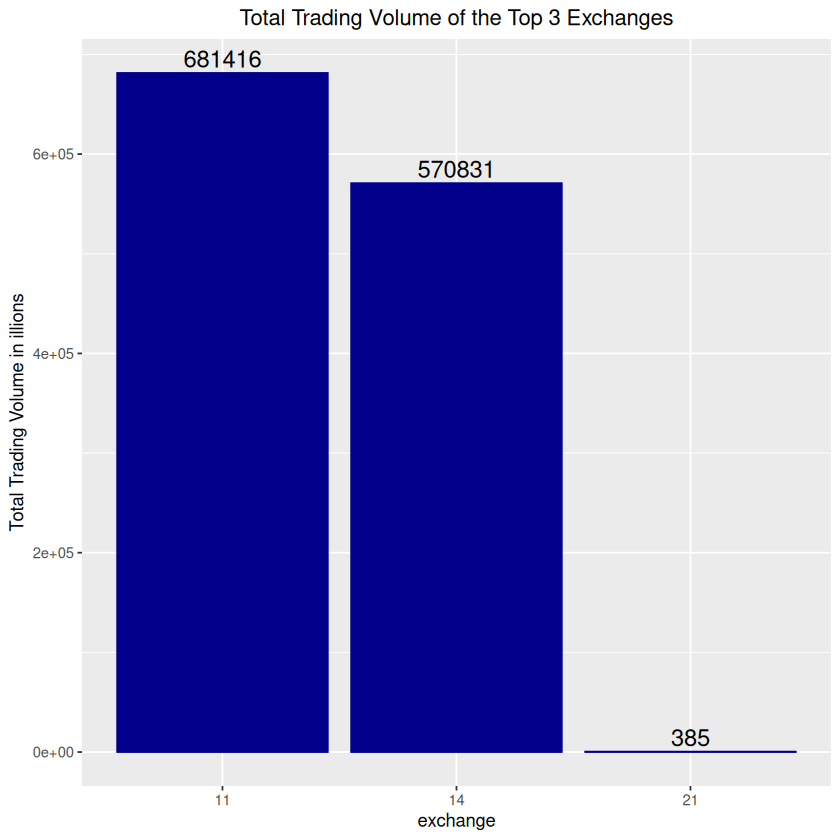

In [136]:
#| fig-cap: "Total Trading Volume of the Top 3 Exchanges"
ggplot(data_4, aes(x = as.character(exchg), y = total_trading_v/1000000)) +
  geom_bar(stat = "identity", color = "darkblue", fill = "darkblue") +
  geom_text(aes(label = round(total_trading_v/1000000)),
            vjust = -0.3,              # position above the bar
            size = 5) +               # text size
  labs(title = "Total Trading Volume of the Top 3 Exchanges",
  x= "exchange", y="Total Trading Volume in illions") +
  theme(plot.title = element_text(hjust = 0.5))

## 6. How many companies have more than one ticker?

In [137]:
#| tbl-cap: "Companies with more than one ticker"
data_6 = data %>%
    group_by(conm) %>%
    summarise(no_of_tickers = n_distinct(tic)) %>%
    ungroup() %>% 
    filter(!no_of_tickers == 1)
data_6[1:4,]
nr_companies = nrow(data_6)
cat("6. There are", nr_companies, "companies with more than one ticker.")

conm,no_of_tickers
<chr>,<int>
ALPHABET INC,2
FOX CORP,2
NEWS CORP,2
NA,NA


6. There are 3 companies with more than one ticker.

## 7. Which ticker has the largest positive mean return (simple daily return)?

In [159]:
# 7. Which ticker has the largest positive mean return (simple daily return)?
data = data %>% 
    group_by(tic) %>% 
    mutate(return = prccd/lag(prccd)-1) %>% 
    ungroup()

data_7 = data %>% 
    group_by(tic) %>% 
    summarise(mean_return = mean(return, na.rm = TRUE)) %>% 
    ungroup() %>% 
        arrange(desc(mean_return))

highest_mean_return = max(data_7$mean_return)

highest_mean_return_ticker = data_7$tic[
    which.max(data_7$mean_return)
]

summary_table_7 <- tibble(
  Ticker = highest_mean_return_ticker,
  Mean_return_perc = round(highest_mean_return, 4)*100
)
summary_table_7

cat("7. The", highest_mean_return_ticker, 
"ticker had the highest mean daily return.")
cat("\n-> The return was", round(highest_mean_return, 4)*100,"%.")

Ticker,Mean_return_perc
<chr>,<dbl>
PLTR,0.58


7. The PLTR ticker had the highest mean daily return.
-> The return was 0.58 %.

## 8. Which company has the largest positive mean return (simple daily return)?

In [161]:
summary_table_8 <- tibble(
  Ticker = highest_mean_return_ticker,
  Company = highest_mean_return_company,
  Mean_return_perc = round(highest_mean_return, 4)*100
)
summary_table_8

highest_mean_return_company = data$conm[
    which(data$tic == highest_mean_return_ticker)[1]
] 
cat("8. The", highest_mean_return_company,
"company had the highest mean daily return.")

Ticker,Company,Mean_return_perc
<chr>,<chr>,<dbl>
PLTR,PALANTIR TECHNOLOG INC,0.58


8. The PALANTIR TECHNOLOG INC company had the highest mean daily return.

## 9. Which industry is represented by the most companies?

In [163]:
data_9 = data %>%
    group_by(sic) %>%
    summarise(no_companies = n_distinct(conm)) %>%
    ungroup() %>% 
    arrange(desc(no_companies))
most_represented_industry = data_9$sic[
    which.max(data_9$no_companies)
]
no_companies_in_most_represented_industry = max(data_9$no_companies)

summary_table_9 <- tibble(
  SIC = most_represented_industry,
  No_of_companies = no_companies_in_most_represented_industry
)
summary_table_9

cat("9. The", most_represented_industry,
"SIC industry has the most companies.")
cat("\n-> There are", no_companies_in_most_represented_industry,
"companies in that industry.")


SIC,No_of_companies
<int>,<int>
6798,28


9. The 6798 SIC industry has the most companies.
-> There are 28 companies in that industry.

# Part 2 Extended Analysis
After preparing the data we carry out the following analysis.

## 1. Calculate simple weekly returns for each ticker in the full dataset

In [141]:
#| tbl-cap: "Simple weekly returns for each ticker"
data_weekly = data %>% 
    ## determine weekly returns based on fridays
    group_by(tic, datadate = floor_date(datadate, "week")+5) %>%
    summarise(weekly_close = last(prccd)) %>%
    arrange(tic, datadate) %>%
    group_by(tic) %>%
    mutate(simple_w_r = (weekly_close / lag(weekly_close)) - 1) %>%
    ungroup()
head(data_weekly)

`summarise()` has grouped output by 'tic'. You can override using the `.groups`
argument.


tic,datadate,weekly_close,simple_w_r
<chr>,<date>,<dbl>,<dbl>
A,2023-01-06,147.67,NA
A,2023-01-13,156.92,0.062639670
A,2023-01-20,155.92,-0.006372674
A,2023-01-27,155.69,-0.001475115
A,2023-02-03,154.55,-0.007322243
A,2023-02-10,152.55,-0.012940796


## 2. Categorise your data into decile groups
(We do not remove zero returns from the data).

In [169]:
#| tbl-cap: "Data categorized by decile groups"
c_breaks = seq(0.1, 1, by = 0.1)
paste0(c_breaks)

c_labels <- paste0((1:(length(c_breaks) - 1)) * 10, "%")
paste0(c_labels)

data_weekly_deciles <- data_weekly %>% 
    filter(!is.na(simple_w_r)) %>% 
    mutate(
        deciles = cut(
            simple_w_r,
            breaks = quantile(
            simple_w_r,
            probs = c_breaks,
            type = 9,
            na.rm = TRUE
            ),
        labels = c_labels,
        include.lowest = TRUE
        )
    ) %>% 
  arrange(tic)
head(data_weekly_deciles)

[1] "0.1" "0.2" "0.3" "0.4" "0.5" "0.6" "0.7" "0.8" "0.9" "1"

[1] "10%" "20%" "30%" "40%" "50%" "60%" "70%" "80%" "90%"

tic,datadate,weekly_close,simple_w_r,deciles
<chr>,<date>,<dbl>,<dbl>,<fct>
A,2023-01-13,156.92,0.062639670,90%
A,2023-01-20,155.92,-0.006372674,30%
A,2023-01-27,155.69,-0.001475115,40%
A,2023-02-03,154.55,-0.007322243,30%
A,2023-02-10,152.55,-0.012940796,30%
A,2023-02-17,148.26,-0.028121927,10%


## 3. Display a table showing the top ticker in each decile group

In [170]:
#| tbl-cap: "Top tickers by decile group"
df_top_ticker = data_weekly_deciles %>% 
    group_by(deciles) %>% 
    filter(simple_w_r == max(simple_w_r, na.rm = TRUE)) %>%
    ungroup() %>%
        arrange(desc(deciles)) %>%
        select(tic, simple_w_r, deciles)
df_top_ticker[1:11,]

tic,simple_w_r,deciles
<chr>,<dbl>,<fct>
SMCI,0.784176534,90%
ETN,0.046986033,80%
TROW,0.029170465,70%
APH,0.018479909,60%
PRU,0.010129310,50%
AXP,0.002281286,40%
NWS,-0.005443235,30%
IPG,-0.014084507,20%
WBD,-0.024780176,10%


## 4. Select the top ticker from the 60% decile group
We use this ticker for the rest of the assignment, including in Part 3.

In [181]:
summary_table_2_4 = tibble (
    Decile = "60%",
    Ticker = top_ticker_60d
)
summary_table_2_4

top_ticker_60d = as.character(df_top_ticker %>% 
    filter(deciles == "60%") %>% 
    select(tic)
    )
cat("4. The ticker with the highest mean weekly return at the 60% decile is", top_ticker_60d)

Decile,Ticker
<chr>,<chr>
60%,APH


4. The ticker with the highest mean weekly return at the 60% decile is APH

## 5. Plot the autocorrelation function for this ticker's entire set of weekly returns

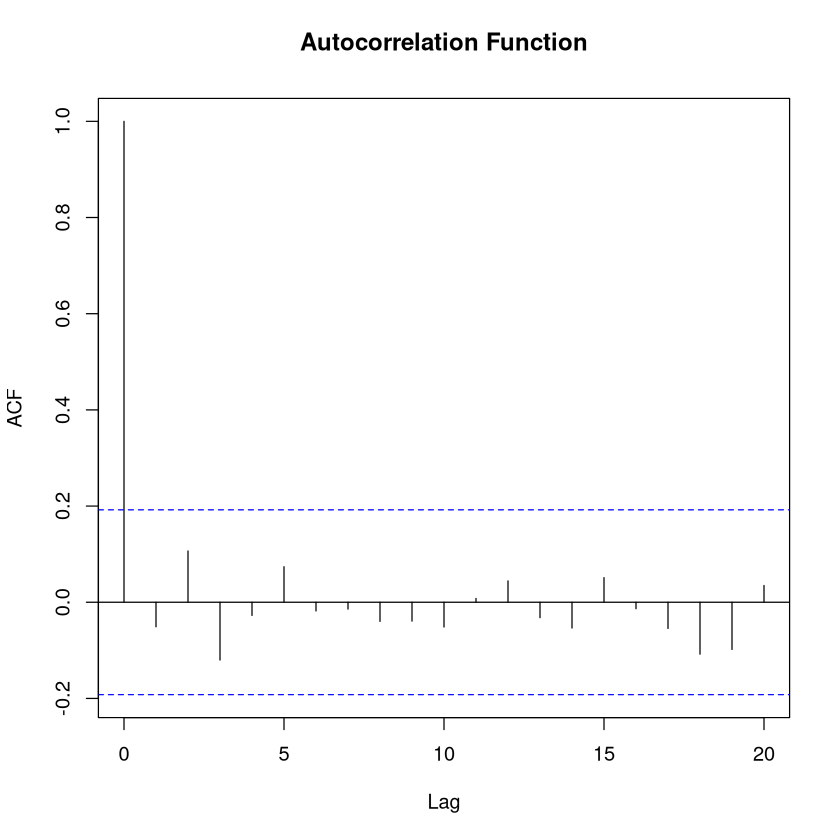

In [145]:
#| fig-cap: "Autocorrelation Function"
# Filter and remove NA values
csco_data = data_weekly %>% 
    filter(tic == top_ticker_60d) %>% 
        na.omit()

acf(csco_data$simple_w_r, main = "Autocorrelation Function")

# Part 3 Regression - Fama-French 3 Factor Model
## 1. Load and clean the weekly Fama-French 3 factor data

In [146]:
#| tbl-cap: "Fama-French 3 Factor Model"
ff <- read.csv("fama_french_weekly.csv", skip = 4) %>%
  rename(x = X,             
         mktrf = Mkt.RF,    
         smb   = SMB,
         hml   = HML,
         rf    = RF) %>%
  mutate(
    date  = ymd(as.character(x)),
    mktrf = mktrf / 100,
    smb   = smb / 100,
    hml   = hml / 100,
    rf    = rf / 100
  ) %>%
  transmute(date, mktrf, smb, hml, rf) %>%
  filter(!is.na(date)) %>%
  arrange(date)

head(ff)

,date,mktrf,smb,hml,rf
,<date>,<dbl>,<dbl>,<dbl>,<dbl>
1,1926-07-02,0.0158,-0.0062,-0.0086,6e-04
2,1926-07-10,0.0037,-0.0090,0.0031,6e-04
3,1926-07-17,0.0098,0.0059,-0.0144,6e-04
4,1926-07-24,-0.0203,0.0002,-0.0017,6e-04
5,1926-07-31,0.0306,-0.0189,-0.0085,6e-04
6,1926-08-07,0.0204,0.0016,0.0055,6e-04


## 2. Fit the Fama-French 3 factor model to the weekly returns of the stock in Part 2

In [182]:
# 1) Get the chosen stock's weekly returns
ticker_data <- data_weekly %>%
  filter(tic == top_ticker_60d) %>%
  select(datadate, simple_w_r) %>%
  filter(!is.na(simple_w_r))

# 2) Join with Fama–French factors (align on week end)
ff_weekly <- ff %>% rename(datadate = date)

merged <- ticker_data %>%
  inner_join(ff_weekly, by = "datadate") %>%
  mutate(excess_return = simple_w_r - rf)

# 3) Fit FF3: excess_return ~ Mkt.RF + SMB + HML
ff3_model <- lm(excess_return ~ mktrf + smb + hml, data = merged)

# 4) Show results
summary(ff3_model)


Call:
lm(formula = excess_return ~ mktrf + smb + hml, data = merged)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.47998 -0.01072  0.00349  0.01654  0.07078 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.003136   0.005454  -0.575 0.566550    
mktrf        1.233157   0.315971   3.903 0.000175 ***
smb          0.368449   0.357088   1.032 0.304698    
hml          0.260722   0.320227   0.814 0.417517    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.05344 on 98 degrees of freedom
Multiple R-squared:  0.1987,	Adjusted R-squared:  0.1742 
F-statistic: 8.102 on 3 and 98 DF,  p-value: 7.11e-05


# Analysis Summary

APH recorded a moderate positive weekly return of around 1.85%, placing it within the 60th performance decile. The autocorrelation analysis revealed no meaningful serial dependence, suggesting that APH’s returns behave largely randomly and that past movements offer little predictive power for future performance.

The Fama–French three-factor regression indicated a strong positive sensitivity to overall market returns, with a statistically significant market beta of about 1.23 (p < 0.001). The coefficients on size (SMB) and value (HML) factors were positive but not statistically significant, implying a limited relationship with these style factors. The adjusted R² of roughly 0.17 suggests that common market factors explain only part of APH’s return variation.

Overall, this pattern points to APH’s performance being moderately linked to general market movements, while firm-specific drivers continue to play an important role in explaining its excess returns.